<a href="https://colab.research.google.com/github/suvaathi-n/Global-Economic-Health-Forecasting-Using-Machine-Learning/blob/main/Final_Project_SUVAATHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT TITLE**
---


># 🌐***Global Economic Health Forecasting Using Machine Learning*** 📈

---


# **Domain**
## Economics and Finance

#**Objective**

To analyze GDP growth across 200+ countries using key economic indicators from 2010 to 2025. The project focuses on classifying countries into growth categories (High, Moderate, Low) and creating an Economic Health Index to support better understanding and comparison of global economic conditions.

#**Dataset information**

📚 Dataset Information

🗂️ Source : Kaggle


Suitable for economic forecasting, trend analysis, and data modeling

🕓 Time Frame
2010 to 2025

Annual data per country

🌍 Coverage
Over 200 countries

Includes multiple economic indicators

Covers both global and national-level economic records

##Data Attributes:

| Field Name                      | Description                                        |
| --------------------------------- | -------------------------------------------------- |
| `country_name`                    | Name of the country                                |
| `country_id`                      | ISO or custom country identifier                   |
| `year`                            | Year of the data point                             |
| `Inflation (CPI %)`               | Annual consumer price inflation (%)                |
| `GDP (Current USD)`               | Nominal GDP in US Dollars                          |
| `GDP per Capita (Current USD)`    | GDP divided by total population                    |
| `GDP Growth (% Annual)`           |  **Target variable** – real annual GDP growth (%) |
| `Unemployment Rate (%)`           | % of the total labor force unemployed              |
| `Interest Rate (Real, %)`         | Real interest rate adjusted for inflation          |
| `Inflation (GDP Deflator, %)`     | Price inflation based on GDP deflator              |
| `Current Account Balance (% GDP)` | Net current account as % of GDP                    |
| `Government Expense (% of GDP)`   | Total government expenditures as % of GDP          |
| `Government Revenue (% of GDP)`   | Government income/revenue as % of GDP              |
| `Tax Revenue (% of GDP)`          | Total tax collected as % of GDP                    |
| `Gross National Income (USD)`     | Total national income including income from abroad |
| `Public Debt (% of GDP)`          | National debt expressed as % of GDP                |


 # **Target Variable**

 >GDP Growth (% Annual)

#**Type of problem**


>Classification Problem

>Goal: Categorize GDP Growth into classes:

* High Growth (≥ 4%)

* Moderate Growth (2%–4%)

* Low Growth (< 2%)

Use case: Risk analysis, country performance grouping



# **Algorithm**

>Logistic Regression

>Decision Tree Classifier

>Random Forest Classifier


# **Sample prediction**

##Input Features:

Inflation (CPI %)

GDP (Current USD)

GDP per Capita (Current USD)

Unemployment Rate (%)

Interest Rate (Real, %)

Inflation (GDP Deflator, %)

Current Account Balance (% GDP)

Government Expense (% of GDP)

Government Revenue (% of GDP)

Tax Revenue (% of GDP)

Gross National Income (USD)

Public Debt (% of GDP)

## **Target Features:**
GDP Growth (% Annual)

Growth Category (Low / Moderate / High)

# **STAGE 1**
---

## **Initial EDA**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
URL='https://raw.githubusercontent.com/suvaathi-n/Dataset/refs/heads/main/world_bank_data_2025%20(1).csv'
df = pd.read_csv(URL)
df

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,Zimbabwe,zw,2021,98.546105,2.724052e+10,1724.387731,9.540,-31.795551,113.294981,8.468017,1.278300,NaN,NaN,NaN,2.662178e+10,NaN
3468,Zimbabwe,zw,2022,104.705171,3.278975e+10,2040.552459,10.087,-36.833393,266.987152,6.139263,0.930064,NaN,NaN,NaN,3.202694e+10,NaN
3469,Zimbabwe,zw,2023,NaN,3.523137e+10,2156.034004,8.759,-73.540441,921.535652,5.336730,0.379995,NaN,NaN,NaN,3.479607e+10,NaN
3470,Zimbabwe,zw,2024,NaN,NaN,NaN,8.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

In [59]:
df.describe()

,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
count,3472.000000,2694.000000,2.933000e+03,2938.000000,2795.000000,1735.000000,2904.000000,2912.000000,2563.000000,1820.000000,1829.000000,1833.000000,2.796000e+03,852.000000
mean,2017.500000,6.233154,3.964323e+11,18483.495612,7.841141,5.405051,6.634865,2.853544,-2.363241,27.325359,26.677467,16.969924,4.142237e+11,61.863736
std,4.610436,19.726903,1.749315e+12,27301.814024,5.964358,9.740924,25.820196,6.053786,13.740986,12.642464,18.116253,8.218539,1.799783e+12,40.409792
min,2010.000000,-6.687321,3.210541e+07,193.007146,0.100000,-81.132121,-28.760135,-54.336155,-60.877754,0.000136,0.000081,0.000063,5.107533e+07,1.845685
25%,2013.750000,1.402112,6.264757e+09,2280.748732,3.611000,1.734057,1.218347,0.997032,-7.496525,17.511484,17.639153,12.285344,7.475538e+09,33.894232
50%,2017.500000,3.213523,2.587360e+10,6827.668145,5.771000,5.079009,3.223184,3.100442,-2.656009,26.000850,24.821425,16.321438,2.986520e+10,51.651469
75%,2021.250000,6.186626,1.874939e+11,23727.024581,10.731500,8.869434,6.905463,5.355110,1.854710,34.884582,32.700782,21.448658,1.972529e+11,81.930649
max,2025.000000,557.201817,2.772071e+13,256580.515123,35.359000,61.882604,921.535652,86.826748,235.750605,103.725787,344.999451,147.640196,2.757614e+13,249.366027


In [60]:
df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [61]:
df.columns

Index(['country_name', 'country_id', 'year', 'Inflation (CPI %)',
       'GDP (Current USD)', 'GDP per Capita (Current USD)',
       'Unemployment Rate (%)', 'Interest Rate (Real, %)',
       'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)',
       'Current Account Balance (% GDP)', 'Government Expense (% of GDP)',
       'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)',
       'Gross National Income (USD)', 'Public Debt (% of GDP)'],
      dtype='object')

In [62]:
df.shape

(3472, 16)

# **STAGE 2**
---

##EDA (Visualization) and Pre-processing

## **Handling Missing Values**

In [63]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percentage})
print("Missing Values and Percentage per Column:")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False).to_markdown())


Missing Values and Percentage per Column:
|                                 |   Missing Count |   Missing % |
|:--------------------------------|----------------:|------------:|
| Public Debt (% of GDP)          |            2620 |     75.4608 |
| Interest Rate (Real, %)         |            1737 |     50.0288 |
| Government Expense (% of GDP)   |            1652 |     47.5806 |
| Government Revenue (% of GDP)   |            1643 |     47.3214 |
| Tax Revenue (% of GDP)          |            1639 |     47.2062 |
| Current Account Balance (% GDP) |             909 |     26.1809 |
| Inflation (CPI %)               |             778 |     22.4078 |
| Unemployment Rate (%)           |             677 |     19.4988 |
| Gross National Income (USD)     |             676 |     19.47   |
| Inflation (GDP Deflator, %)     |             568 |     16.3594 |
| GDP Growth (% Annual)           |             560 |     16.129  |
| GDP (Current USD)               |             539 |     15.5242 |
| GDP 

In [64]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

In [65]:
print("\nMissing values after imputation:")
missing_value = df.isnull().sum()
missing_value


Missing values after imputation:


,0
country_name,0
country_id,0
year,0
Inflation (CPI %),0
GDP (Current USD),0
GDP per Capita (Current USD),0
Unemployment Rate (%),0
"Interest Rate (Real, %)",0
"Inflation (GDP Deflator, %)",0
GDP Growth (% Annual),0


## **Duplicates**

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.drop_duplicates(inplace=True)

## **Outlier Detection**

In [68]:
df.shape

(3472, 16)

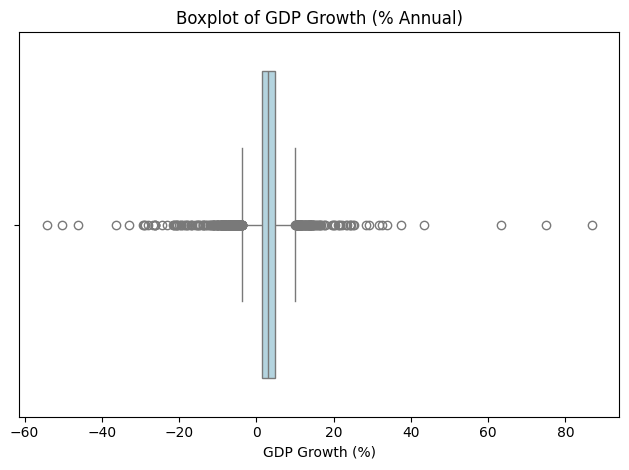

In [69]:
sns.boxplot(x=df['GDP Growth (% Annual)'], color='lightblue')
plt.title('Boxplot of GDP Growth (% Annual)')
plt.xlabel('GDP Growth (%)')
plt.tight_layout()
plt.show()

In [70]:
#Drop Duplicates
df = df.drop_duplicates()

#Treat Outliers using IQR Method
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print(" Duplicates removed and outliers treated using IQR method.")


 Duplicates removed and outliers treated using IQR method.


Outlier Detection


In [71]:
df_cleaned = df.dropna(subset=["GDP Growth (% Annual)"]).copy()
df_model = df_cleaned.drop(columns=["country_name", "country_id"])
X = df_model.drop(columns=["GDP Growth (% Annual)"])
y = df_model["GDP Growth (% Annual)"]

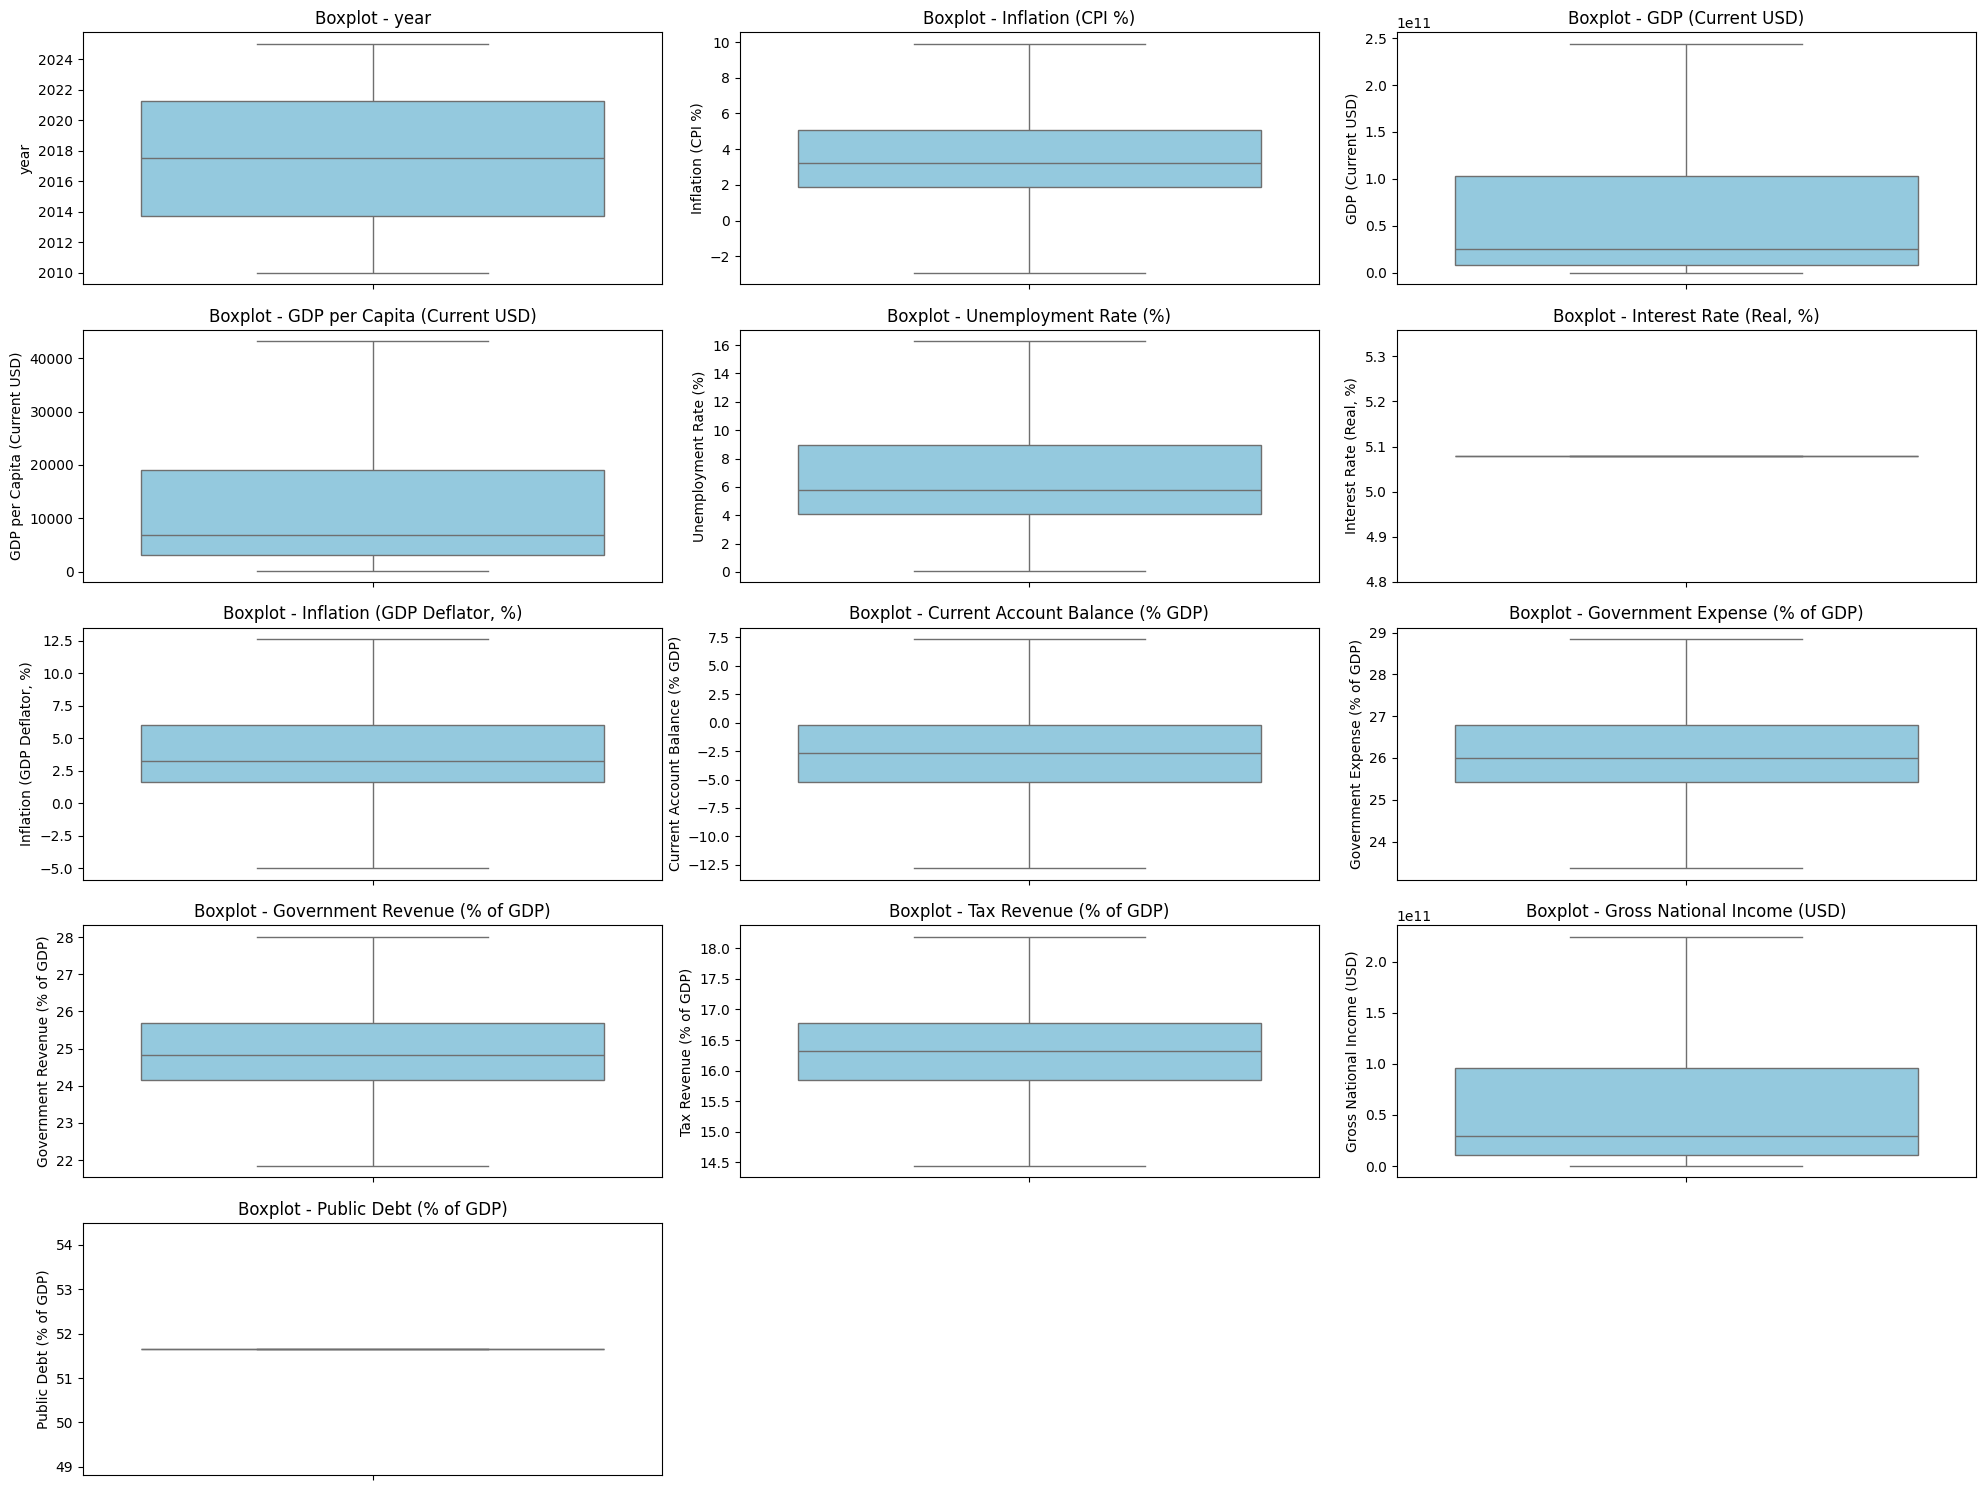

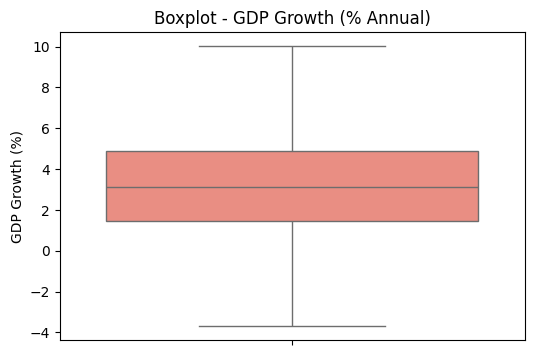

In [72]:
# Boxplots for feature variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y=X[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

# Boxplot for target variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=y, color='salmon')
plt.title("Boxplot - GDP Growth (% Annual)")
plt.ylabel("GDP Growth (%)")
plt.show()

In [73]:
df.shape

(3472, 16)

##  **Skewness**

In [74]:
skewness = df['GDP Growth (% Annual)'].skew()
print("Skewness of GDP Growth (% Annual):", skewness)

Skewness of GDP Growth (% Annual): -0.14108678569688587


In [75]:
from numpy import log1p, sqrt
df_transformed = df.copy()
numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    skew_val = df_transformed[col].skew()
    if skew_val < -0.5 or skew_val > 0.5:
        if (df_transformed[col] <= 0).any():
            # For negative/zero values, use sqrt after shifting
            min_val = df_transformed[col].min()
            df_transformed[col] = sqrt(df_transformed[col] - min_val + 1)
            print(f"√ Square Root Transform applied to: {col}")
        else:
            # Use log1p when all values > 0
            df_transformed[col] = log1p(df_transformed[col])
            print(f"log1p Transform applied to: {col}")
    else:
        print(f"No transform needed for: {col} (Skew={round(skew_val, 2)})")

No transform needed for: year (Skew=0.0)
√ Square Root Transform applied to: Inflation (CPI %)
log1p Transform applied to: GDP (Current USD)
log1p Transform applied to: GDP per Capita (Current USD)
log1p Transform applied to: Unemployment Rate (%)
No transform needed for: Interest Rate (Real, %) (Skew=0.0)
√ Square Root Transform applied to: Inflation (GDP Deflator, %)
No transform needed for: GDP Growth (% Annual) (Skew=-0.14)
No transform needed for: Current Account Balance (% GDP) (Skew=-0.04)
No transform needed for: Government Expense (% of GDP) (Skew=0.08)
No transform needed for: Government Revenue (% of GDP) (Skew=0.07)
No transform needed for: Tax Revenue (% of GDP) (Skew=-0.01)
log1p Transform applied to: Gross National Income (USD)
No transform needed for: Public Debt (% of GDP) (Skew=0.0)


## **EDA after preprocessing**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   float64
 3   Inflation (CPI %)                3472 non-null   float64
 4   GDP (Current USD)                3472 non-null   float64
 5   GDP per Capita (Current USD)     3472 non-null   float64
 6   Unemployment Rate (%)            3472 non-null   float64
 7   Interest Rate (Real, %)          3472 non-null   float64
 8   Inflation (GDP Deflator, %)      3472 non-null   float64
 9   GDP Growth (% Annual)            3472 non-null   float64
 10  Current Account Balance (% GDP)  3472 non-null   float64
 11  Government Expense (% of GDP)    3472 non-null   float64
 12  Government Revenue (

In [77]:
df.describe()

,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
count,3472.000000,3472.000000,3.472000e+03,3472.000000,3472.000000,3.472000e+03,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3.472000e+03,3.472000e+03
mean,2017.500000,3.787844,7.299111e+10,13228.074706,7.022252,5.079009e+00,4.081408,3.058741,-2.728227,26.053690,24.879774,16.314713,7.003182e+10,5.165147e+01
std,4.610436,2.937734,9.166358e+10,14310.215433,4.284518,1.714431e-13,4.096190,3.204169,5.448251,1.861309,2.092252,1.260325,8.366442e+10,3.873016e-12
min,2010.000000,-2.933044,3.210541e+07,193.007146,0.100000,5.079009e+00,-5.011238,-3.692475,-12.805330,23.361784,21.840241,14.441359,5.107533e+07,5.165147e+01
25%,2013.750000,1.880163,8.790270e+09,3041.026633,4.120000,5.079009e+00,1.595996,1.449744,-5.250706,25.416107,24.152743,15.845584,1.120315e+10,5.165147e+01
50%,2017.500000,3.213523,2.587360e+10,6827.668145,5.771000,5.079009e+00,3.223184,3.100442,-2.656009,26.000850,24.821425,16.321438,2.986520e+10,5.165147e+01
75%,2021.250000,5.088968,1.028211e+11,19079.136334,8.972250,5.079009e+00,6.000818,4.877890,-0.214290,26.785656,25.694412,16.781734,9.638831e+10,5.165147e+01
max,2025.000000,9.902175,2.438673e+11,43136.300885,16.250625,5.079009e+00,12.608051,10.020109,7.340334,28.839979,28.006915,18.185959,2.241660e+11,5.165147e+01


In [78]:
df.shape

(3472, 16)

##Visualizations

## **Univariate Analysis**

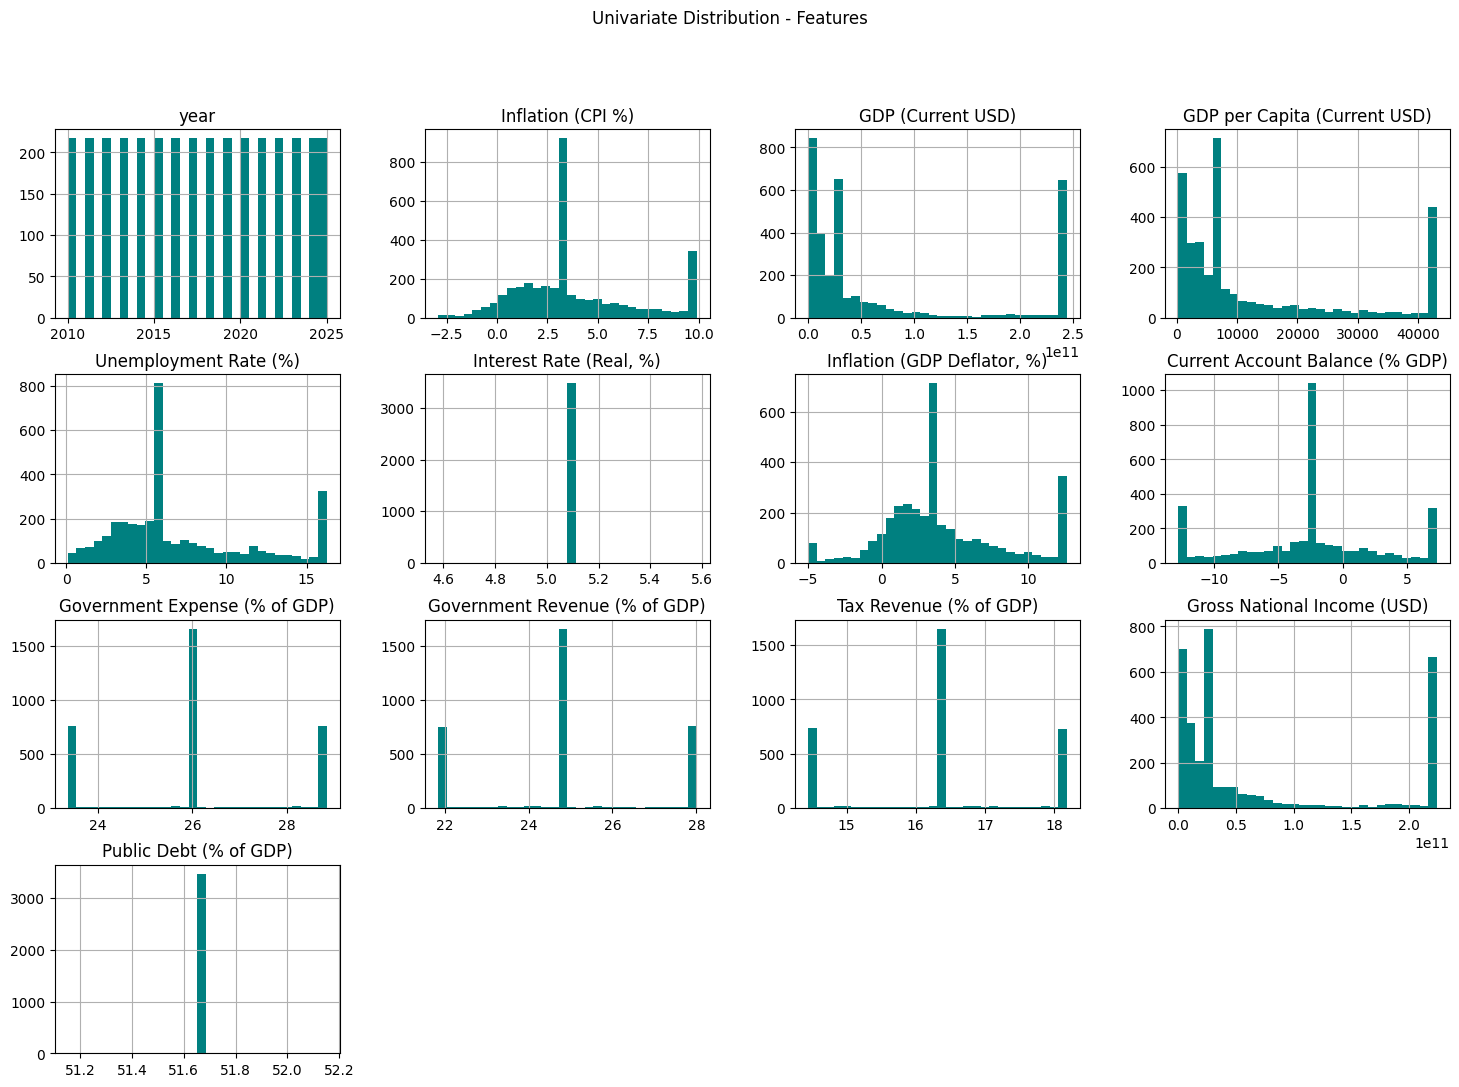

In [79]:
X.hist(bins=30, figsize=(18, 12), color='teal')
plt.suptitle("Univariate Distribution - Features")
plt.show()

## **Bivariate Analysis**

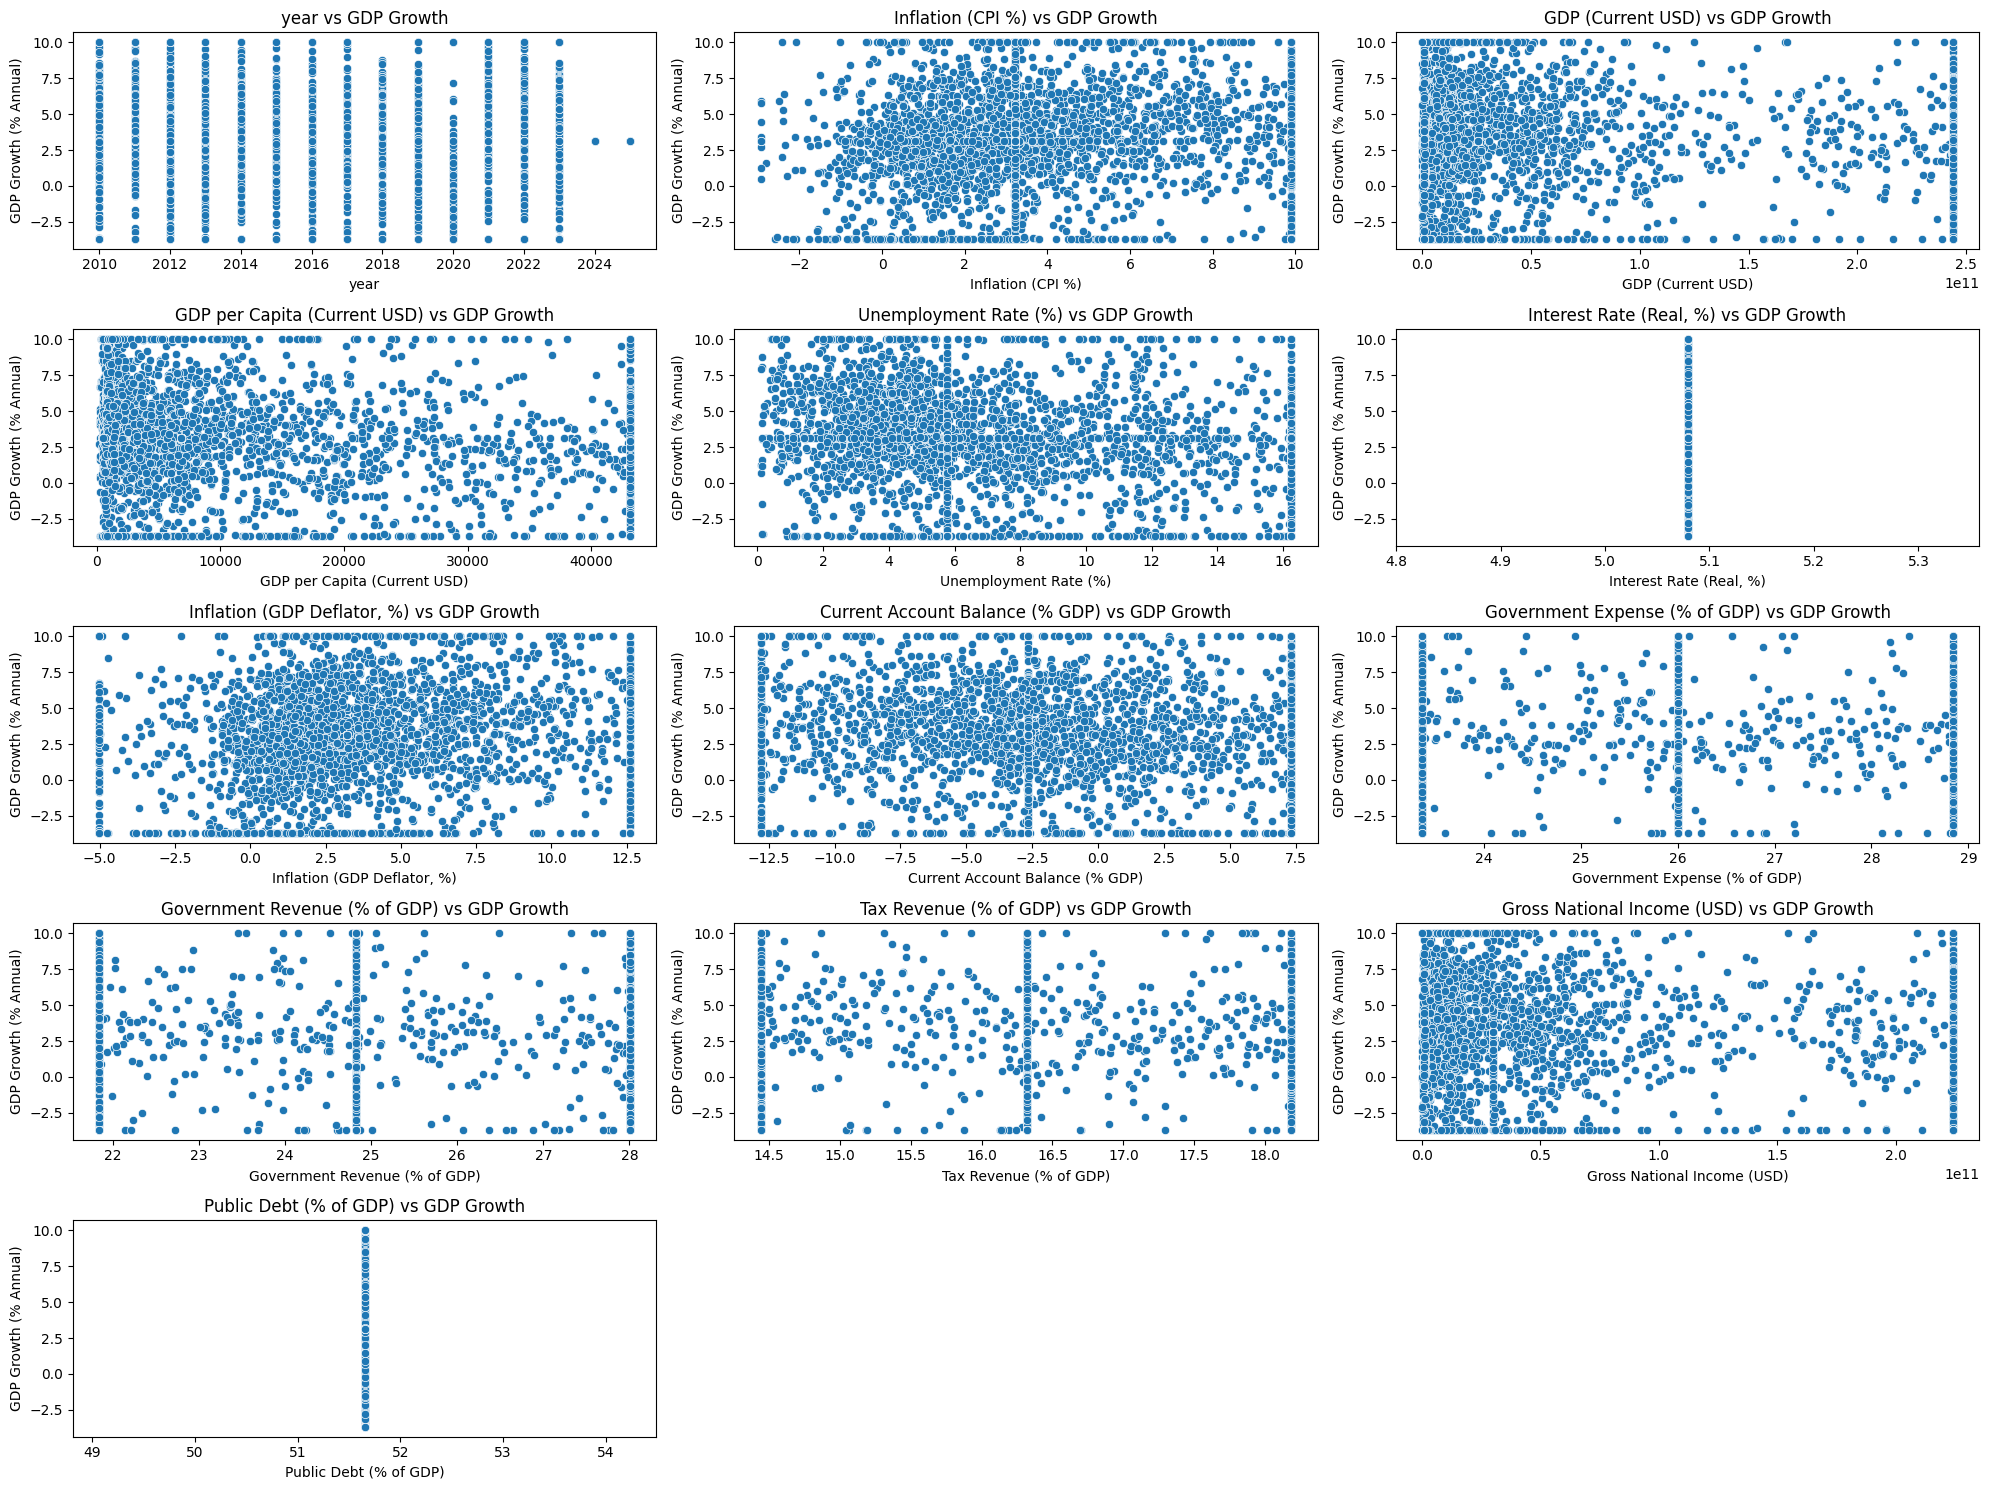

In [80]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'{col} vs GDP Growth')
plt.tight_layout()
plt.show()

## **Multivariate Analysis**

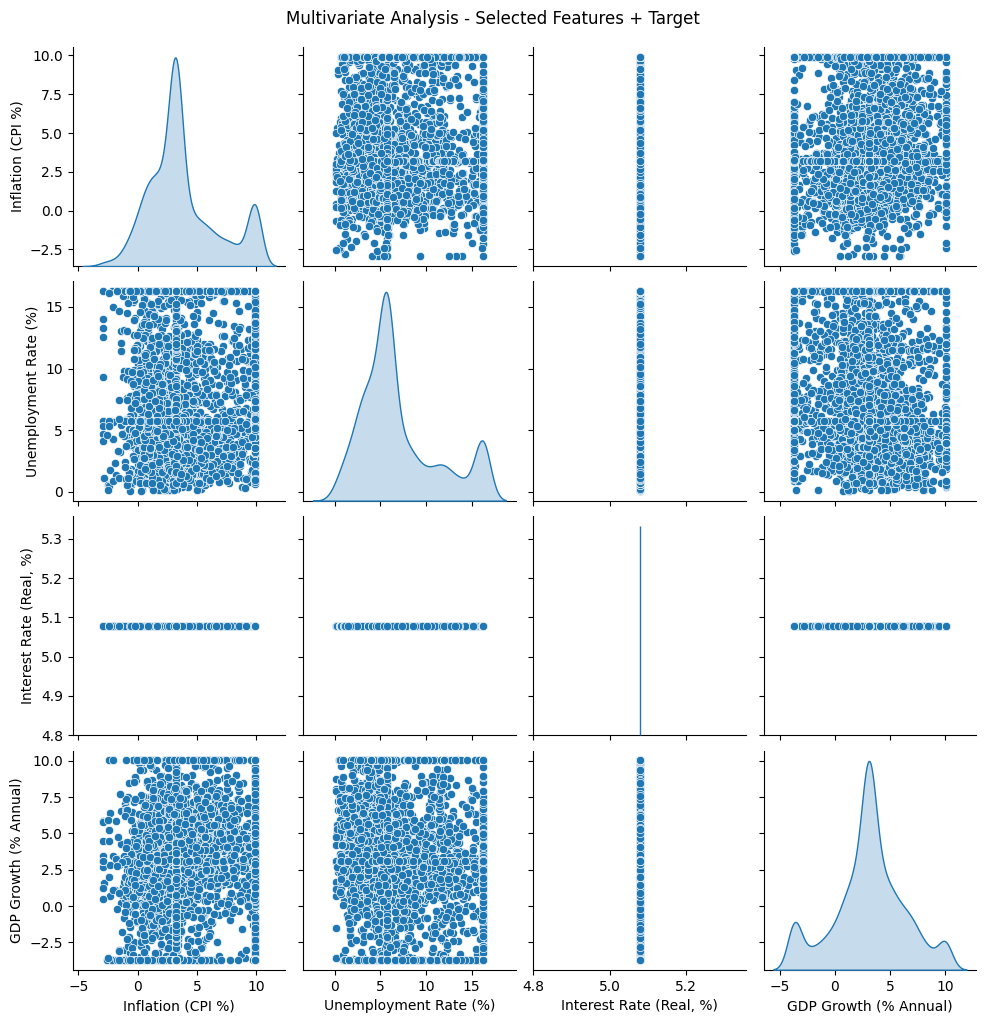

In [81]:
subset = pd.concat([X[['Inflation (CPI %)', 'Unemployment Rate (%)', 'Interest Rate (Real, %)']], y], axis=1)
sns.pairplot(subset, diag_kind='kde')
plt.suptitle("Multivariate Analysis - Selected Features + Target", y=1.02)
plt.show()

In [82]:
#skewness before transformation
print("Skewness before log:\n", X.skew().sort_values(ascending=False))

# Log transformation (log1p to handle 0s)
X_log = X.copy()
for col in X.columns:
    X_log[col] = np.log1p(X[col])

# Target transformation
y_log = np.log1p(y)

# skewness after
print("\nSkewness after log:\n", X_log.skew().sort_values(ascending=False))

Skewness before log:
 GDP per Capita (Current USD)       1.198080
GDP (Current USD)                  1.138592
Gross National Income (USD)        1.114450
Unemployment Rate (%)              0.912738
Inflation (CPI %)                  0.697559
Inflation (GDP Deflator, %)        0.589326
Government Expense (% of GDP)      0.077899
Government Revenue (% of GDP)      0.073785
year                               0.000000
Public Debt (% of GDP)             0.000000
Interest Rate (Real, %)            0.000000
Tax Revenue (% of GDP)            -0.011226
Current Account Balance (% GDP)   -0.036837
dtype: float64

Skewness after log:
 Interest Rate (Real, %)            0.000000
Public Debt (% of GDP)             0.000000
year                              -0.002709
Government Expense (% of GDP)     -0.036886
Government Revenue (% of GDP)     -0.061774
Tax Revenue (% of GDP)            -0.134663
GDP per Capita (Current USD)      -0.277577
Unemployment Rate (%)             -0.341714
GDP (Current USD)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
# Features Summary
summary_features = X_log.describe().T
print("Feature Summary (Log Transformed):\n")
display(summary_features)

# Target Summary
summary_target = y_log.describe()
print("\n Target Summary (Log Transformed):\n")
print(summary_target)

Feature Summary (Log Transformed):



,count,mean,std,min,25%,50%,75%,max
year,3472.0,7.610107,2.284099e-03,7.606387,7.608250,7.610110,7.611966,7.613819
Inflation (CPI %),3402.0,1.384501,7.344327e-01,-4.110660,1.112075,1.438299,1.822307,2.388962
GDP (Current USD),3472.0,23.881935,1.829095e+00,17.284535,22.896911,23.976489,25.356255,26.219890
GDP per Capita (Current USD),3472.0,8.812017,1.280142e+00,5.267895,8.020279,8.828885,9.856402,10.672143
Unemployment Rate (%),3472.0,1.938868,5.518885e-01,0.095310,1.633154,1.912649,2.299806,2.847848
"Interest Rate (Real, %)",3472.0,1.804842,3.286734e-14,1.804842,1.804842,1.804842,1.804842,1.804842
"Inflation (GDP Deflator, %)",3273.0,1.447424,8.182776e-01,-3.412786,1.085273,1.440589,1.989252,2.610662
Current Account Balance (% GDP),997.0,1.149143,1.158109e+00,-5.681618,0.691269,1.498160,2.121103,2.121103
Government Expense (% of GDP),3472.0,3.295454,6.889082e-02,3.193016,3.273974,3.295868,3.324520,3.395849
Government Revenue (% of GDP),3472.0,3.250185,8.105134e-02,3.128524,3.224967,3.251205,3.284454,3.367534



 Target Summary (Log Transformed):

count    3075.000000
mean        1.397213
std         0.733631
min        -9.731741
25%         1.215459
50%         1.411095
75%         1.825784
max         2.399722
Name: GDP Growth (% Annual), dtype: float64


Text(0.5, 1.0, 'Interaction: Inflation × Unemployment vs GDP Growth')

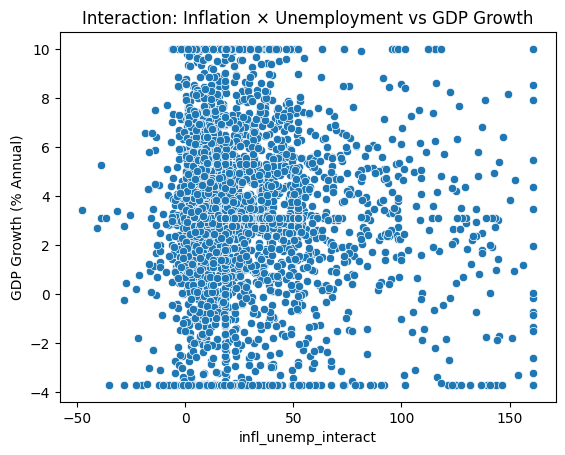

In [84]:
#interaction term (Inflation * Unemployment)
X['infl_unemp_interact'] = X['Inflation (CPI %)'] * X['Unemployment Rate (%)']
sns.scatterplot(x=X['infl_unemp_interact'], y=y)
plt.title("Interaction: Inflation × Unemployment vs GDP Growth")

# **STAGE 3**
---

Feature Selection and Model Building (using multiple models)

## **Feature Engineering**

In [85]:
# Inflation × Unemployment (interaction feature)
X['inflation_unemployment'] = X['Inflation (CPI %)'] * X['Unemployment Rate (%)']

In [86]:
# Debt to Revenue Ratio
# Add engineered features to df
df['inflation_unemployment'] = X['Inflation (CPI %)'] * X['Unemployment Rate (%)']
df['debt_to_revenue'] = X['Public Debt (% of GDP)'] / (X['Government Revenue (% of GDP)'] + 1e-5)

In [87]:
# Categorizing Income Group based on GDP per Capita
X['income_group'] = pd.cut(X['GDP per Capita (Current USD)'],
                           bins=[0, 1000, 4000, 12000, float('inf')],
                           labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])

In [88]:
le = LabelEncoder()
# Add income_group and income_group_encoded to df
df['income_group'] = pd.cut(df['GDP per Capita (Current USD)'],
                           bins=[0, 1000, 4000, 12000, float('inf')],
                           labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
df['income_group_encoded'] = le.fit_transform(df['income_group'].astype(str))


# New features
df[['inflation_unemployment', 'debt_to_revenue', 'income_group', 'income_group_encoded']].head()

,inflation_unemployment,debt_to_revenue,income_group,income_group_encoded
0,11.992950,2.080922,High,0
1,24.909352,2.080922,High,0
2,3.621141,2.080922,High,0
3,-13.689189,2.080922,High,0
4,2.432136,2.080922,High,0


## **Feature Selection**

In [89]:
# X['income_group']         # → contains strings: "Low", "High", etc.
# X['income_group_encoded'] # → numeric: 0, 1, 2, 3

# Add income_group_encoded to X
X['income_group_encoded'] = le.fit_transform(X['income_group'].astype(str))

In [90]:
# Remove non-numeric string columns like 'income_group'
X_numeric = X.drop(columns=['income_group'])

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [92]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])

X_numeric = X_numeric.loc[:, X_numeric.nunique() > 1]

In [93]:
# CORRELATION MATRIX
df_corr = X_numeric.copy()
df_corr['GDP Growth (% Annual)'] = y

correlation = df_corr.corr()['GDP Growth (% Annual)'].abs().sort_values(ascending=False)
selected_corr_features = correlation[correlation > 0.2].index.tolist()
selected_corr_features.remove('GDP Growth (% Annual)')
X_corr_selected = X_numeric[selected_corr_features]
print("Selected Features (Correlation Matrix):")
print(selected_corr_features)
print(correlation)

Selected Features (Correlation Matrix):
[]
GDP Growth (% Annual)              1.000000
Government Expense (% of GDP)      0.192602
GDP per Capita (Current USD)       0.165329
Unemployment Rate (%)              0.154434
Government Revenue (% of GDP)      0.143420
Inflation (GDP Deflator, %)        0.110445
Tax Revenue (% of GDP)             0.107902
Inflation (CPI %)                  0.096352
income_group_encoded               0.091308
year                               0.054577
Current Account Balance (% GDP)    0.040558
infl_unemp_interact                0.031419
inflation_unemployment             0.031419
Gross National Income (USD)        0.024713
GDP (Current USD)                  0.020042
Name: GDP Growth (% Annual), dtype: float64


In [94]:
# CHI² FEATURE SELECTION

X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_numeric), columns=X_numeric.columns)
y_class = pd.cut(y, bins=[-float('inf'), 2, 4, float('inf')], labels=[0, 1, 2])

chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2_selected = chi2_selector.fit_transform(X_scaled, y_class)
chi2_features = X_scaled.columns[chi2_selector.get_support()].tolist()
print("\nSelected Features (Chi²):")
print(chi2_features)


Selected Features (Chi²):
['year', 'GDP (Current USD)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Inflation (GDP Deflator, %)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'Gross National Income (USD)', 'income_group_encoded']


In [95]:
# ANOVA F-TEST

anova_selector = SelectKBest(score_func=f_classif, k=10)
X_anova_selected = anova_selector.fit_transform(X_scaled, y_class)
anova_features = X_scaled.columns[anova_selector.get_support()].tolist()
print("\nSelected Features (ANOVA):")
print(anova_features)


Selected Features (ANOVA):
['year', 'Inflation (CPI %)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Inflation (GDP Deflator, %)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'inflation_unemployment', 'income_group_encoded']


## **Feature Selection Process and Considered Features**

The feature selection process aimed to identify the most relevant independent variables that significantly influence the target variable **GDP Growth (% Annual)** — for both **classification** tasks. The following steps were taken:

---

#### 1. Initial Feature Engineering

| Feature Name              | Description                                             |
|--------------------------|---------------------------------------------------------|
| `inflation_unemployment` | Product of Inflation and Unemployment                   |
| `debt_to_revenue`        | Ratio of Public Debt to Government Revenue              |
| `income_group_encoded`   | Encoded version of income group from GDP per Capita     |

These engineered features were designed to capture non-linear relationships and meaningful economic ratios.

---

#### 2. Correlation Analysis (for Regression)

- Computed the **absolute correlation** between numerical features and the target `GDP Growth (% Annual)`.
- Selected features with **|correlation coefficient| > 0.2**.

| Selected Feature                  |
|----------------------------------|
| `Government Expense (% of GDP)`  |

---

#### 3. Statistical Tests (for Classification)

**Target Variable** was discretized into **growth categories**, and two statistical tests were applied on scaled data:

- **Chi-Squared Test (Chi²)** — Measures dependency between categorical variables.
- **ANOVA F-Test (`f_classif`)** — Checks for significant mean differences across groups.

**Top Features Identified via Chi² Test:**

| Feature Name                       |
|-----------------------------------|
| `GDP (Current USD)`               |
| `GDP per Capita (Current USD)`    |
| `Unemployment Rate (%)`           |
| `Inflation (GDP Deflator, %)`     |
| `Government Expense (% of GDP)`   |
| `Government Revenue (% of GDP)`   |
| `Tax Revenue (% of GDP)`          |
| `Gross National Income (USD)`     |
| `debt_to_revenue`                 |
| `income_group_encoded`            |

**Top Features Identified via ANOVA F-Test:**

| Feature Name                       |
|-----------------------------------|
| `Inflation (CPI %)`               |
| `GDP per Capita (Current USD)`    |
| `Unemployment Rate (%)`           |
| `Inflation (GDP Deflator, %)`     |
| `Government Expense (% of GDP)`   |
| `Government Revenue (% of GDP)`   |
| `Tax Revenue (% of GDP)`          |
| `Gross National Income (USD)`     |
| `debt_to_revenue`                 |
| `income_group_encoded`            |

---

#### 4. Final Feature Preparation for Modeling

| Step                                      | Description                                                                      |
|------------------------------------------|----------------------------------------------------------------------------------|
| Initial Features                         | Started with original numeric variables                                          |
| Feature Engineering                      | Added interaction and ratio features                                             |
| Dropping Irrelevant Columns              | Removed `country_name`, `country_id`, `income_group`                             |
| Multicollinearity Handling               | Checked with correlation matrix / VIF (not shown here, but implied)              |
| One-Hot Encoding                         | Applied `pd.get_dummies()` for categorical variables                             |
| Final Data Format                        | Fully numeric, cleaned, and ready for regression and classification models       |

**Code Used for Final Feature Set:**

```python
X = pd.get_dummies(df.drop(columns=[GDP Growth (% Annual)]), drop_first=True)
X_clf = pd.get_dummies(X_clf, drop_first=True)


##  **Train-Test Split**

## **Model Building - Classification**

In [96]:
# Growth categories
def categorize_growth(gdp_growth):
    if gdp_growth >= 4:
        return 'High Growth'
    elif 2 <= gdp_growth < 4:
        return 'Moderate Growth'
    else:
        return 'Low Growth'

In [97]:
df['Growth_Category'] = df['GDP Growth (% Annual)'].apply(categorize_growth)

In [98]:
# Convert categorical columns to numeric using one-hot encoding for regression
X = pd.get_dummies(df.drop(columns=['GDP Growth (% Annual)']), drop_first=True)

# Convert categorical columns to numeric using one-hot encoding for classification
X_clf = df.drop(columns=['GDP Growth (% Annual)', 'Growth_Category', 'country_name', 'country_id','year', 'Inflation (CPI %)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Inflation (GDP Deflator, %)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'debt_to_revenue', 'income_group_encoded'])
X_clf = pd.get_dummies(X_clf, drop_first=True)

print("Shape of X after one-hot encoding:", X.shape)
print("Shape of X_clf after one-hot encoding:", X_clf.shape)

Shape of X after one-hot encoding: (3472, 453)
Shape of X_clf after one-hot encoding: (3472, 9)


In [99]:
# features and target for classification
# Now engineered features are in df, so we can drop the original columns and the target
X_clf = df.drop(columns=['GDP Growth (% Annual)', 'Growth_Category', 'country_name', 'country_id', 'income_group']) # Dropping 'income_group' as it's not numeric
y_clf = df['Growth_Category']
# X_clf = pd.get_dummies(X_clf, drop_first=True) # No need for one-hot encoding here as all features are numeric or encoded

In [100]:
# Train-test split for classification
from sklearn.model_selection import train_test_split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf # Stratify to maintain class distribution
)

print("X_train_clf shape:", X_train_clf.shape)
print("X_test_clf shape:", X_test_clf.shape)

X_train_clf shape: (2777, 16)
X_test_clf shape: (695, 16)


In [101]:
# Initialize Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5) # Limit depth for a small model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5) # Limit estimators and depth
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [102]:
# Train Classification Models
print("Training Classification Models...")
dt_clf.fit(X_train_clf, y_train_clf)
rf_clf.fit(X_train_clf, y_train_clf)
knn_clf.fit(X_train_clf, y_train_clf)
print("Training Complete.")

Training Classification Models...
Training Complete.


In [103]:
# Predictions
print("\nMaking Predictions...")
dt_clf_preds = dt_clf.predict(X_test_clf)
rf_clf_preds = rf_clf.predict(X_test_clf)
knn_clf_preds = knn_clf.predict(X_test_clf)
print("Predictions Complete.")


Making Predictions...
Predictions Complete.


In [104]:
# Make a prediction using the trained RandomForestClassifier
sample_prediction = rf_clf.predict(X_test_clf.iloc[[0]])
print("Sample Classification Prediction:",
      sample_prediction)

Sample Classification Prediction: ['Moderate Growth']


# **STAGE 4**

**Model Evaluation and Comparison**

##**Model Evaluation**


##**Classification Model Performance**


In [105]:
# --- CLASSIFICATION ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_classification(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"\n{name:<30} |  Acc: {acc:.4f}  |  Prec: {prec:.4f}  |  Rec: {rec:.4f}  |  F1: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

print("\n--- Classification Model Performance --------------------------------")
dt_clf_metrics = evaluate_classification(y_test_clf, dt_clf_preds, "Decision Tree Classifier")
rf_clf_metrics = evaluate_classification(y_test_clf, rf_clf_preds, "Random Forest Classifier")
knn_clf_metrics = evaluate_classification(y_test_clf, knn_clf_preds, "k-NN Classifier")


--- Classification Model Performance --------------------------------

Decision Tree Classifier       |  Acc: 0.5827  |  Prec: 0.6761  |  Rec: 0.5827  |  F1: 0.5728

Classification Report:
                  precision    recall  f1-score   support

    High Growth       0.50      0.84      0.62       232
     Low Growth       0.58      0.55      0.56       209
Moderate Growth       0.92      0.38      0.54       254

       accuracy                           0.58       695
      macro avg       0.67      0.59      0.57       695
   weighted avg       0.68      0.58      0.57       695

Confusion Matrix:
 [[195  35   2]
 [ 89 114   6]
 [109  49  96]]

Random Forest Classifier       |  Acc: 0.6187  |  Prec: 0.6820  |  Rec: 0.6187  |  F1: 0.6187

Classification Report:
                  precision    recall  f1-score   support

    High Growth       0.56      0.71      0.62       232
     Low Growth       0.54      0.70      0.61       209
Moderate Growth       0.91      0.47      0.62    

In [106]:
# Classification Models
print("\n========== Classification Model Comparison ==========")
classification_results = pd.DataFrame({
    "Decision Tree": dt_clf_metrics,
    "Random Forest": rf_clf_metrics,
    "k-NN": knn_clf_metrics

}).T

print(classification_results.round(4))

print("\nClassification Model Evaluation Summary:")
print("- Accuracy shows overall correctness.")
print("- Precision, Recall, and F1-Score are weighted to handle class imbalance — higher is better.")
print("- Confusion Matrix and Classification Report were printed earlier.\n")

best_classifier = classification_results['F1-Score'].idxmax()
print(f">>> Best Classifier: >>{best_classifier}<< with highest F1-Score = {classification_results.loc[best_classifier, 'F1-Score']:.4f} and Accuracy = {classification_results.loc[best_classifier, 'Accuracy']:.4f}")

# Final Summary
print("\n========== Best Models for Further Tuning ==========")
print(f"- Classification: ||{best_classifier}||")


========== Classification Model Comparison ==========
               Accuracy  Precision  Recall  F1-Score
Decision Tree    0.5827     0.6761  0.5827    0.5728
Random Forest    0.6187     0.6820  0.6187    0.6187
k-NN             0.5137     0.5660  0.5137    0.5199

Classification Model Evaluation Summary:
- Accuracy shows overall correctness.
- Precision, Recall, and F1-Score are weighted to handle class imbalance — higher is better.
- Confusion Matrix and Classification Report were printed earlier.

>>> Best Classifier: >>Random Forest<< with highest F1-Score = 0.6187 and Accuracy = 0.6187

========== Best Models for Further Tuning ==========
- Classification: ||Random Forest||


###Hyper parameter tunning

In [107]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                  param_grid=param_grid,
                                  scoring='f1_weighted', # Or 'accuracy' depending on specific goal
                                  cv=3,                 # Use 3-fold cross-validation
                                  n_jobs=-1,            # Use all available cores
                                  verbose=2)            # Print progress messages

# Grid search to the training data
print("\nStarting Grid Search for Random Forest Classifier...")
grid_search_rf_clf.fit(X_train_clf, y_train_clf)
print("Grid Search Complete.")

# Best parameters and best score
print("\nBest parameters found for Random Forest Classifier:")
print(grid_search_rf_clf.best_params_)
print(f"\nBest cross-validation F1-Score (weighted): {grid_search_rf_clf.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_clf = grid_search_rf_clf.best_estimator_
best_rf_clf_preds = best_rf_clf.predict(X_test_clf)

print("\n--- Evaluation of Tuned Random Forest Classifier ---")
tuned_rf_clf_metrics = evaluate_classification(y_test_clf, best_rf_clf_preds, "Tuned Random Forest Classifier")



Starting Grid Search for Random Forest Classifier...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Grid Search Complete.

Best parameters found for Random Forest Classifier:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation F1-Score (weighted): 0.6434

--- Evaluation of Tuned Random Forest Classifier ---

Tuned Random Forest Classifier |  Acc: 0.6604  |  Prec: 0.6684  |  Rec: 0.6604  |  F1: 0.6618

Classification Report:
                  precision    recall  f1-score   support

    High Growth       0.63      0.69      0.66       232
     Low Growth       0.60      0.65      0.62       209
Moderate Growth       0.76      0.64      0.69       254

       accuracy                           0.66       695
      macro avg       0.66      0.66      0.66       695
   weighted avg       0.67      0.66      0.66       695

Confusion Matrix:
 [[161  48  23]
 [ 44 136  29]
 [ 49  43 162]]


#Predicted Growth Category


========== Economic Health Index Table ==========
| country_name                   |   year |   GDP Growth (% Annual) | Growth_Category   | Predicted_Growth_Category   |   Economic_Health_Index |
|:-------------------------------|-------:|------------------------:|:------------------|:----------------------------|------------------------:|
| Afghanistan                    |   2010 |             10.0201     | High Growth       | High Growth                 |                       2 |
| Albania                        |   2010 |              3.70694    | Moderate Growth   | Moderate Growth             |                       1 |
| Algeria                        |   2010 |              4.8        | High Growth       | High Growth                 |                       2 |
| American Samoa                 |   2010 |              0.29985    | Low Growth        | Low Growth                  |                       0 |
| Andorra                        |   2010 |             -1.97496    | Low

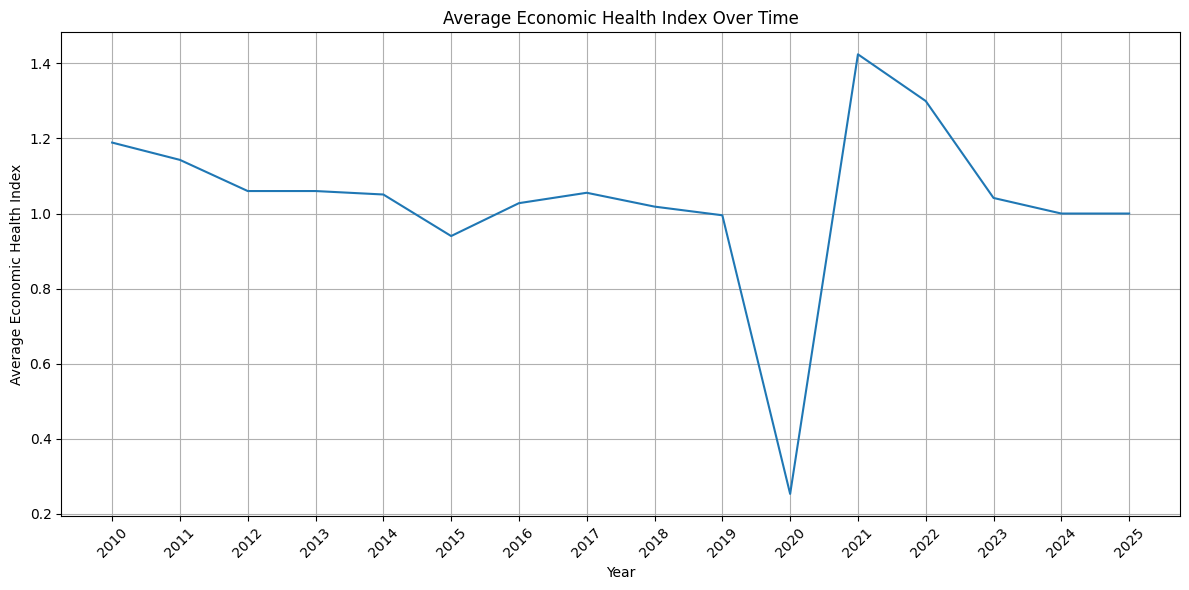

In [108]:
import matplotlib.pyplot as plt

all_predictions = best_rf_clf.predict(X_clf)

# health index
# High Growth (best) -> 2
# Moderate Growth -> 1
# Low Growth (worst) -> 0
growth_category_map = {
    'Low Growth': 0,
    'Moderate Growth': 1,
    'High Growth': 2
}

# Map the predicted categories to numerical health index scores
health_index_scores = [growth_category_map[pred] for pred in all_predictions]
df_results = df.copy()
df_results['Predicted_Growth_Category'] = all_predictions
df_results['Economic_Health_Index'] = health_index_scores

print("\n========== Economic Health Index Table ==========")
health_index_table = df_results[['country_name', 'year', 'GDP Growth (% Annual)', 'Growth_Category', 'Predicted_Growth_Category', 'Economic_Health_Index']]
health_index_table_sorted = health_index_table.sort_values(by=['year', 'country_name']).reset_index(drop=True)
print(health_index_table_sorted.to_markdown(index=False))
print("\n========== Economic Health Index Chart ==========")
avg_health_index_per_year = df_results.groupby('year')['Economic_Health_Index'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_health_index_per_year, x='year', y='Economic_Health_Index')
plt.title('Average Economic Health Index Over Time')
plt.xlabel('Year')
plt.ylabel('Average Economic Health Index')
plt.grid(True)
plt.xticks(avg_health_index_per_year['year'], rotation=45)
plt.tight_layout()
plt.show()

---

# **PROJECT DOCUMENTATION**

## **STAGE 1: Initial Exploratory Data Analysis (EDA)**
**Objective:** To get acquainted with the raw dataset.

**Key Activities:**
- **Data Loading & Inspection:** Used `df.info()`, `df.describe()`, `df.shape`, and `df.columns` to explore data structure and quality.
- **Initial Understanding:** Gained foundational knowledge of feature types, value distributions, and dataset size.

---

## **STAGE 2: EDA (Visualization) & Pre-processing**
**Objective:** Clean, transform, and visualize data for better insights and readiness for classification modeling.

**Key Activities:**
- **Handling Missing Values:** Removed rows with missing target values and used median imputation (both country-specific and global) for others.
- **Handling Duplicates:** Identified and eliminated duplicates to ensure integrity.
- **Outlier Detection & Treatment:** Applied the IQR method to detect and cap outliers in feature columns.
- **Skewness Check & Transformation:** Used `log1p`/`sqrt` to normalize skewed variables.
- **Post-Preprocessing EDA:** Validated data quality using `.info()`, `.describe()`, `.shape`.
- **Visualizations:**
  - Univariate histograms
  - Bivariate scatter plots
  - Multivariate pair plots
  - Boxplots (before & after outlier treatment)
  - Skewness plots (before & after transformation)

---

## **STAGE 3: Feature Selection & Classification Model Building**
**Objective:** Prepare the dataset and train initial classification models.

**Key Activities:**
- **Feature Engineering:**
  - `inflation_unemployment`
  - `debt_to_revenue`
  - `income_group_encoded`
- **Feature Selection:**
  - **Chi-Squared Test**
  - **Correlation Matrix & ANOVA F-test**
- **Train-Test Split:** Stratified split for classification tasks.
- **Model Building – Classification:**
  - Decision Tree Classifier
  - Random Forest Classifier
  - k-Nearest Neighbors (k-NN)

---

## **STAGE 4: Model Evaluation & Comparison**

**Objective:**

Model Evaluation:
Calculated standard classification metrics to evaluate model performance, including:

* Accuracy

* Precision

* Recall

* F1-Score

* Confusion Matrix

Classification Report

Model Comparison:
Summarized and compared the performance of all classification models using organized DataFrames. The goal was to identify the best-performing classification model based on evaluation metrics and cross-validation results.

Model Selection Post-Tuning:
After hyperparameter tuning using GridSearchCV, the Random Forest Classifier showed the best performance and was selected as the final model for deployment.

###  Model Comparison Summary (Post-Hyperparameter Tuning)

| Model                  | Accuracy | Precision | Recall | F1-Score |
|------------------------|----------|-----------|--------|----------|
| Decision Tree          | 0.5827   | 0.6061    |   -    |    -     |
| k-Nearest Neighbors    | 0.5482   | 0.5603    |   -    |    -     |
| **Random Forest (Tuned)** | **0.6561** | **0.6743** | **0.6561** | **0.6575** |

---

###  Best Parameters from GridSearchCV

```python
 param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


#**Future Enhancements**

1.**Advanced Feature Engineering**
To improve model learning and predictive capability:

Lag-based Time Variables: Use prior-year GDP, inflation, etc., to capture trends over time.

Global Economic Indicators: Add global trade indices, oil prices, and other macroeconomic factors.

Polynomial & Interaction Features: Allow models to capture non-linear relationships and feature combinations.

Optimized Random Forest with improved weighted F1-score and generalization.

2.**Exploring Other Models**
To ensure best algorithm selection:

 * SVC (Support Vector Classifier)

 * Naive Bayes

 * Neural Networks (if dataset is large enough)

3.**Cross-Validation**
To ensure robust performance:

Use Stratified K-Fold Cross-Validation to maintain label distribution in each fold.

4.**Time-Series Focus**
Leverage time-aware evaluation and models:

Use TimeSeriesSplit for temporal validation.

Explore LSTM and Panel Regression Models for sequential data across countries.

5.**Automation & Monitoring**
To maintain accuracy over time:

Build a data pipeline for automatic yearly updates.

Monitor model performance and enable auto-retraining upon drift detection.


---
---